In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Mengatur agar plot matplotlib tampil inline di notebook
%matplotlib inline
# Mengatur style plot seaborn
sns.set_style('whitegrid')

# 1. Memuat Data

Memuat dataset `heart_failure_clinical_records.csv` dari folder `data/`.

In [47]:
# CONTOH HASIL PASTE (JANGAN DIKETIK MANUAL, TAPI PASTE DARI SIDEBAR)
file_path = '/content/heart_failure_clinical_records_dataset.csv'

df = pd.read_csv(file_path)

# Tampilkan 5 baris pertama
print("Data berhasil dimuat. 5 baris pertama:")
display(df.head())

Data berhasil dimuat. 5 baris pertama:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# 2. Exploratory Data Analysis (EDA)

Melakukan analisis awal untuk memahami data, sesuai dengan rencana di proposal (Bab 3.1).

In [48]:
print("Informasi Dataset (Tipe Data & Nilai Non-Null):")
df.info()

print("\nRingkasan Statistik Fitur Numerik:")
display(df.describe())

Informasi Dataset (Tipe Data & Nilai Non-Null):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), in

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### 2.1. Analisis Variabel Target (DEATH_EVENT)

Menganalisis distribusi kelas target untuk melihat ketidakseimbangan (imbalance) data.

Distribusi Kelas Target (DEATH_EVENT):
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


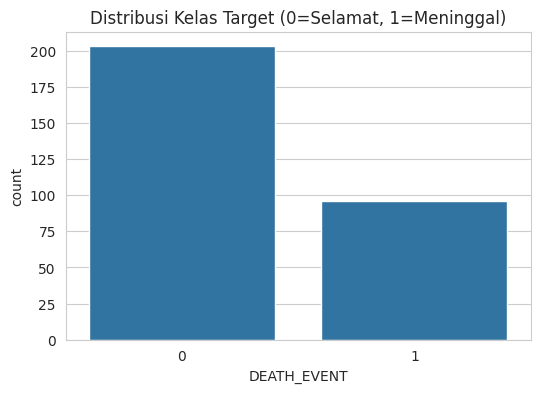


Observasi: Data tidak seimbang (imbalanced), sesuai proposal.


In [49]:
print("Distribusi Kelas Target (DEATH_EVENT):")
print(df['DEATH_EVENT'].value_counts())

# Visualisasi
plt.figure(figsize=(6, 4))
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Distribusi Kelas Target (0=Selamat, 1=Meninggal)')
plt.show()

print("\nObservasi: Data tidak seimbang (imbalanced), sesuai proposal.")

### 2.2. Analisis Fitur

Melihat distribusi dari fitur-fitur numerik dan kategorikal.

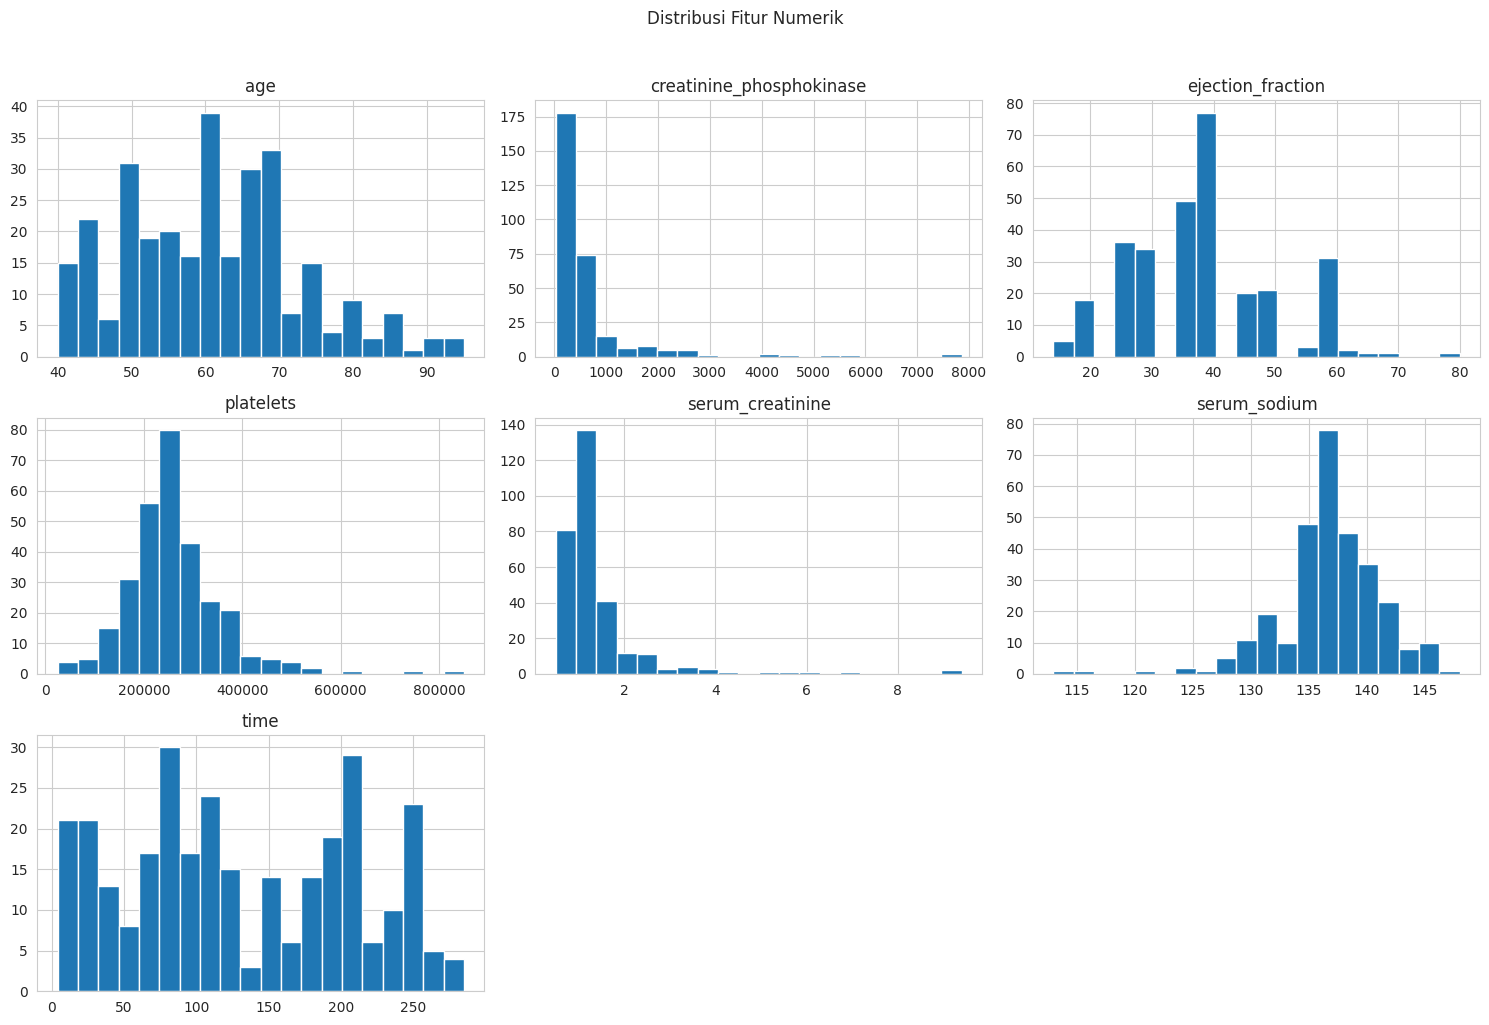

In [50]:
# Kita pisahkan fitur biner/kategorikal agar histogram lebih bermakna
binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
numeric_features = [col for col in df.columns if col not in binary_features + ['DEATH_EVENT']]

# Plot histogram untuk fitur numerik
df[numeric_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribusi Fitur Numerik', y=1.02)
plt.tight_layout()
plt.show()

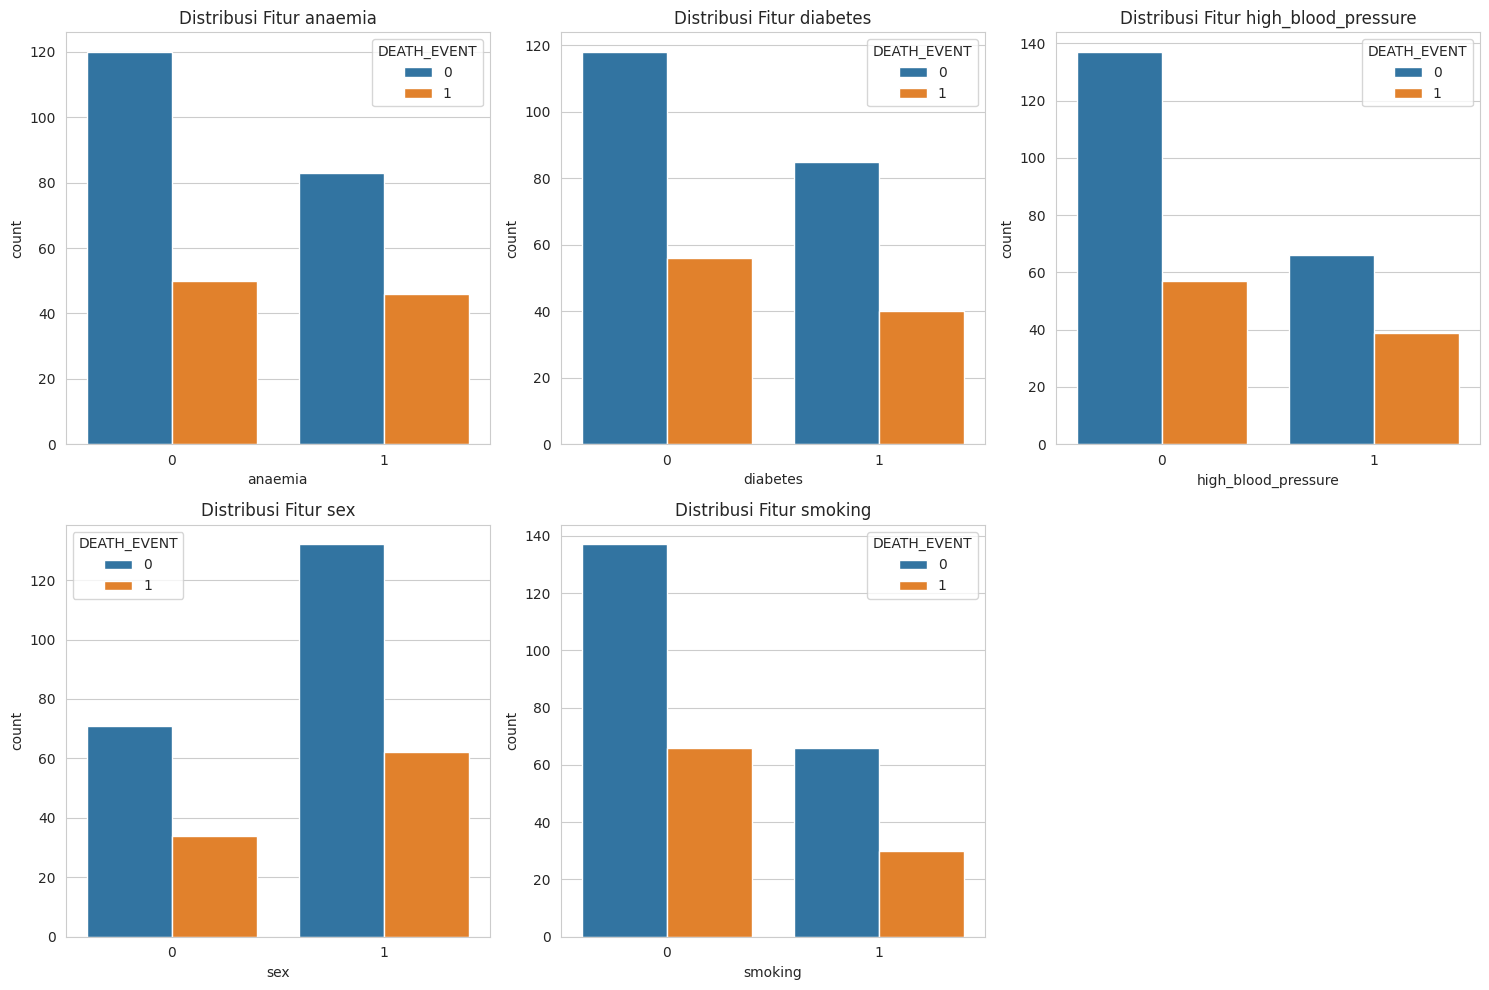

In [51]:
# Plot countplot untuk fitur biner
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(binary_features):
    sns.countplot(x=col, data=df, hue='DEATH_EVENT', ax=axes[i])
    axes[i].set_title(f'Distribusi Fitur {col}')

# Menghapus subplot ekstra jika ada
if len(binary_features) < len(axes):
    for j in range(len(binary_features), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 2.3. Analisis Korelasi (Heatmap)

Membuat heatmap korelasi untuk melihat hubungan antar semua fitur. Ini adalah salah satu visualisasi yang direncanakan di proposal (Bab 3.4).

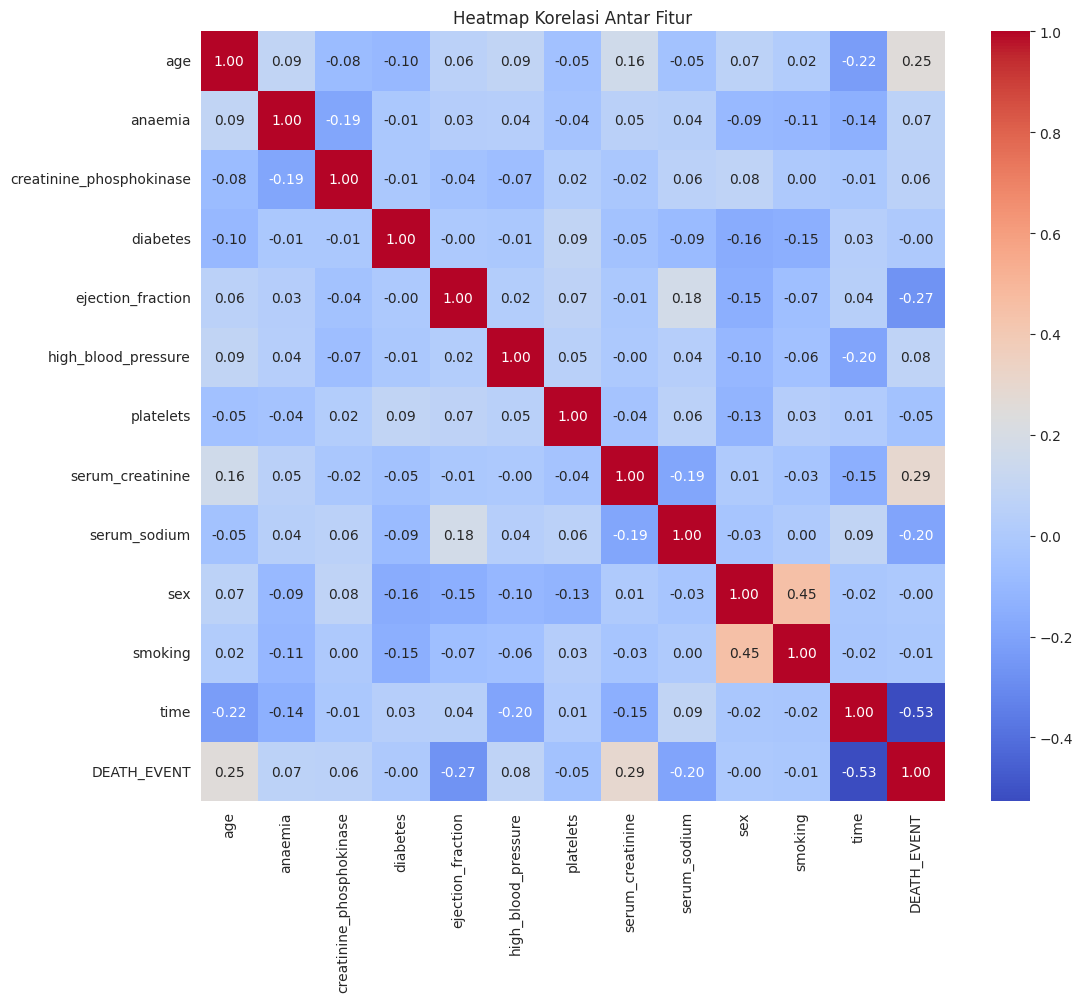

In [52]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

# 3. Preprocessing Data

Mempersiapkan data untuk modeling:
1.  Memisahkan fitur (X) dan target (y).
2.  Melakukan Train-Test Split (proporsi 80-20 dan *stratified*).
3.  Melakukan Feature Scaling (StandardScaler) pada data training dan testing.

In [53]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

print("Bentuk X (fitur):", X.shape)
print("Bentuk y (target):", y.shape)

Bentuk X (fitur): (299, 12)
Bentuk y (target): (299,)


In [54]:
# Melakukan split 80% training dan 20% testing
# stratify=y sangat PENTING untuk memastikan proporsi kelas target tetap sama
# di data train dan test, karena data kita imbalanced.

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,  # random_state untuk hasil yang konsisten
    stratify=y
)

print("Bentuk X_train:", X_train.shape)
print("Bentuk X_test:", X_test.shape)
print("\nDistribusi target di y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribusi target di y_test:")
print(y_test.value_counts(normalize=True))

Bentuk X_train: (239, 12)
Bentuk X_test: (60, 12)

Distribusi target di y_train:
DEATH_EVENT
0    0.677824
1    0.322176
Name: proportion, dtype: float64

Distribusi target di y_test:
DEATH_EVENT
0    0.683333
1    0.316667
Name: proportion, dtype: float64


In [55]:
# Logistic Regression sensitif terhadap skala fitur.
# Kita wajib melakukan scaling.

# 1. Buat scaler
scaler = StandardScaler()

# 2. Fit scaler HANYA pada data training (X_train)
scaler.fit(X_train)

# 3. Transformasi X_train dan X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ubah kembali menjadi DataFrame agar mudah dibaca dan disimpan
# (Penting: gunakan 'columns=X.columns' untuk menjaga nama kolom)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Data training setelah scaling (5 baris pertama):")
display(X_train_scaled_df.head())

Data training setelah scaling (5 baris pertama):


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,-0.269050,1.110696,-0.200735,-0.900337,0.176528,-0.770281,-1.004722,-0.360437,0.559915,-1.333818,-0.682831,-0.467847
1,-0.706883,-0.900337,-0.534318,1.110696,1.847425,-0.770281,1.051685,-0.544467,-0.345802,0.749728,-0.682831,-1.359167
2,1.219579,-0.900337,-0.020580,-0.900337,-1.494369,1.298227,0.013401,0.467698,-1.477949,0.749728,-0.682831,-1.591685
3,0.256348,-0.900337,-0.455129,-0.900337,-1.076645,-0.770281,-0.178127,0.927773,-0.345802,0.749728,-0.682831,1.121028
4,-1.407414,-0.900337,-0.020580,-0.900337,-1.494369,1.298227,-1.387778,0.191653,-0.345802,0.749728,-0.682831,0.681827


# 4. Menyimpan Data yang Telah Diproses

Menyimpan data `X_train_scaled`, `X_test_scaled`, `y_train`, dan `y_test` ke folder `data/` agar bisa langsung digunakan oleh Notebook `02_Modeling_Logistic_Regression.ipynb`.

In [56]:
import os

# Tentukan path penyimpanan
path_prefix = '../data/'

# Pastikan direktori ada
os.makedirs(path_prefix, exist_ok=True)

# Simpan data yang sudah bersih dan terpisah
X_train_scaled_df.to_csv(path_prefix + 'X_train_scaled.csv', index=False)
X_test_scaled_df.to_csv(path_prefix + 'X_test_scaled.csv', index=False)
y_train.to_csv(path_prefix + 'y_train.csv', index=False)
y_test.to_csv(path_prefix + 'y_test.csv', index=False)

print("Data telah diproses dan disimpan di folder 'data/':")
print(f"- X_train_scaled.csv ({X_train_scaled_df.shape})")
print(f"- X_test_scaled.csv ({X_test_scaled_df.shape})")
print(f"- y_train.csv ({y_train.shape})")
print(f"- y_test.csv ({y_test.shape})")

Data telah diproses dan disimpan di folder 'data/':
- X_train_scaled.csv ((239, 12))
- X_test_scaled.csv ((60, 12))
- y_train.csv ((239,))
- y_test.csv ((60,))


# Selesai

EDA dan Preprocessing telah selesai. Data bersih siap untuk modeling di notebook `02_Modeling_Logistic_Regression.ipynb`.

In [57]:
from google.colab import drive
drive.mount('/content/drive')

# Tentukan path ke Google Drive (Bikin folder 'project_ml' otomatis jika belum ada)
import os
path_drive = '/content/drive/MyDrive/project_ml/'
if not os.path.exists(path_drive):
    os.makedirs(path_drive)

# Simpan data ke Google Drive
X_train_scaled_df.to_csv(path_drive + 'X_train_scaled.csv', index=False)
X_test_scaled_df.to_csv(path_drive + 'X_test_scaled.csv', index=False)
y_train.to_csv(path_drive + 'y_train.csv', index=False)
y_test.to_csv(path_drive + 'y_test.csv', index=False)

print(f"Data berhasil disimpan di Google Drive folder: {path_drive}")

Mounted at /content/drive
Data berhasil disimpan di Google Drive folder: /content/drive/MyDrive/project_ml/
